In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import ast
folder_path = "data"
single_data = "data/participant_30240.csv"
df_list = []

# Iterate through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, file)
        print(f"Reading: {file}")
        try:
            df_individual = pd.read_csv(file_path, on_bad_lines='skip')
            df_list.append(df_individual)
        except Exception as e:
            print(f"Error reading {file}: {e}")

df = pd.concat(df_list, ignore_index=True)
df_individual = pd.read_csv(single_data, on_bad_lines='skip')
df = df_individual # CHANGE
df['ID'] = df['ID'].ffill()
df['ID'] = df['ID'].astype(int)
df['PayoutDistNum'] = df['PayoutDistNum'].ffill()
df['PayoutDistNum'] = df['PayoutDistNum'].astype(int)

trial_df = df[df['TrialType'].str.startswith('pirate_recog')].dropna(axis=1,how='all')
trial_df['reward'] = trial_df['reward'].astype(int)

trial_df.groupby('ID')['reward'].mean()

Reading: participant_1111.csv
Reading: participant_30240.csv
Reading: participant_3007.csv
Reading: participant_3014.csv
Reading: participant_3025.csv
Reading: participant_5090.csv
Reading: participant_3026.csv
Reading: participant_9999.csv


ID
30240    0.833333
Name: reward, dtype: float64

In [416]:
df_learn = df[(df['TrialType'].str.startswith('pirate_'))&(~df['TrialType'].str.contains("recog"))]
df_learn = df_learn.dropna(axis=1,how='all')

In [417]:
# Step 1: Convert string to actual list
location_list = ast.literal_eval(df_individual['contextOrder'][0])

# Step 2: Get unique items
unique_locations = list(set(location_list))

print(unique_locations)

['driftwood_beach', 'sunleaf_forest', 'greenrock_mountain', 'coral_beach', 'icecap_mountain', 'stonepine_forest']


In [418]:
df_individual['reward'] = pd.to_numeric(df_individual['reward'], errors='coerce')
df_probe = df_individual[df_individual['TrialType'].str.startswith('pirate_recog')].dropna(axis=1, how='all').reset_index(drop='index')
# CHANGE WHEN NEW DATA
df_probe = df_probe[0:59]
df_probe

df_probe_updated = df_probe.merge(
    df_learn[['probe', 'choice', 'reward']].rename(
        columns={'choice': 'learn_choice', 'reward': 'learn_reward'}
    ),
    on='probe',
    how='left'
)

In [419]:
pt2_df = df_individual[df_individual['TrialType'].str.contains("pt2_pirate")].dropna(axis=1,how='all')
pt2_df['TrialNum'] = pt2_df['TrialType'].str.extract(r'_(\d+)')
pt2_df['TrialChoice'] = pt2_df['choice'].str.extract(r'(\w+)_')

In [420]:
target_rows = df_individual[df_individual['TrialType'].str.startswith('pirate_recog')].index + 2

valid_indices = target_rows[target_rows < len(df)]

result_df = df_individual.loc[valid_indices].reset_index(drop=True)

result_df = result_df[result_df['TrialType'].str.contains("pt2_pirate")].dropna(axis=1,how='all')
result_df['Deck, Trial'] = result_df['choice'].str.extract(r'^(black|red|white)')[0] + ', ' + result_df['TrialType'].str.extract(r'pt2_pirate_(\d+)')[0]
result_df
sub_df = result_df[['ID','TrialType','Deck, Trial','reward']]


In [421]:
import pandas as pd

# Step 1: Group by context and choice, then count reward occurrences
counts = df_learn.groupby(['context', 'choice'])['reward'].value_counts().unstack(fill_value=0)

# Step 2: Rename for clarity
counts = counts.rename(columns={'0': 'count_0', '1': 'count_1'})

# Step 3: Compute probability
counts['reward_prob'] = (counts['count_1'] - counts['count_0']) / (counts['count_0'] + counts['count_1'])

# Step 4 (optional): Reset index to make a flat DataFrame
result_new_df = counts.reset_index()
result_new_df['choice_color'] = result_new_df['choice'].str.extract(r'^(black|red|white)')[0].fillna("no_trial")

In [422]:
sub_df

,ID,TrialType,"Deck, Trial",reward
0,30240,pt2_pirate_14,"red, 14",1.0
1,30240,pt2_pirate_17,"red, 17",0.0
2,30240,pt2_pirate_18,"red, 18",0.0
3,30240,pt2_pirate_23,"red, 23",0.0
4,30240,pt2_pirate_24,"red, 24",1.0
5,30240,pt2_pirate_27,"black, 27",0.0
6,30240,pt2_pirate_30,"black, 30",0.0
7,30240,pt2_pirate_31,"red, 31",1.0
8,30240,pt2_pirate_37,"red, 37",1.0
9,30240,pt2_pirate_38,"black, 38",0.0


In [423]:
col_df  =sub_df['Deck, Trial'].str.extract(r'(\d+)').astype(int)
# Extract the numbers as a list
numbers = col_df[0].tolist()

colors = ["red", "white", "black"]

# Create combined strings
combined = [f"{color}, {num}" for num in numbers for color in colors]

# Create final DataFrame
regression_df = pd.DataFrame(combined, columns=["Deck, Trial"])

# First, split the "Deck, Trial" column into color and number
regression_df[['color', 'number']] = regression_df['Deck, Trial'].str.split(', ', expand=True)
regression_df['number'] = regression_df['number'].astype(int) 
df_probe_updated['TrialNum'] = regression_df['number'].unique()
df_probe_updated['TrialChoice'] = df_probe_updated['learn_choice'].str.extract(r'(\w+)_')
def context_name(row):
    if row['context'] == '1':
        return 'driftwood_beach'
    elif row['context'] == '2':
        return 'sunleaf_forest'
    elif row['context'] == '3':
        return 'icecap_mountain'
    elif row['context'] == '4':
        return 'coral_beach'
    elif row['context'] == '5':
        return 'greenrock_mountain'
    elif row['context'] == '6':
        return 'stonepine_forest'
    else:   
        return 'no_trial'

df_probe_updated['context_name'] = df_probe_updated.apply(context_name,axis=1)

def compute_c(row):
    return int(
        ((pt2_df['TrialNum'].astype(int) == row['number']) & 
         (pt2_df['TrialChoice'].str.lower() == row['color'])).any()
    )

def compute_cr(row):
    match = pt2_df[
        (pt2_df['TrialNum'].astype(int) == row['number']) &
        (pt2_df['TrialChoice'].str.lower() == row['color'])
    ]
    # If there's a match and reward == 1, return 1
    if not match.empty and (match['reward'] == 1).any():
        return 1
    return 0

def compute_r(row):
    probe_row = df_probe_updated[df_probe_updated['TrialNum'].astype(int) == int(row['number'])]
    if probe_row.empty:
        return None
    return probe_row.iloc[0]['reward'].astype(int)

def compute_confidence(row):
    probe_row = df_probe_updated[df_probe_updated['TrialNum'].astype(int) == int(row['number'])]
    if probe_row.empty:
        return None
    return int((probe_row.iloc[0]['confidence']=='sure'))

def compute_di1(row):
    return int(
        ((pt2_df['TrialNum'].astype(int) == row['number']- 1) & 
         (pt2_df['TrialChoice'].str.lower() == row['color'])).any()
    )
def compute_di2(row):
    return int(
        ((pt2_df['TrialNum'].astype(int) == row['number']- 2) & 
         (pt2_df['TrialChoice'].str.lower() == row['color'])).any()
    )
def compute_di3(row):
    return int(
        ((pt2_df['TrialNum'].astype(int) == row['number']- 3) & 
         (pt2_df['TrialChoice'].str.lower() == row['color'])).any()
    )
def compute_dr1(row):
    match = pt2_df[
        (pt2_df['TrialNum'].astype(int) == row['number']-1) &
        (pt2_df['TrialChoice'].str.lower() == row['color'])
    ]
    # If there's a match and reward == 1, return 1
    if not match.empty and (match['reward'] == 1).any():
        return 1
    return 0
def compute_dr2(row):
    # Filter for matching trial and choice
    match = pt2_df[
        (pt2_df['TrialNum'].astype(int) == row['number']-2) &
        (pt2_df['TrialChoice'].str.lower() == row['color'])
    ]
    # If there's a match and reward == 1, return 1
    if not match.empty and (match['reward'] == 1).any():
        return 1
    return 0
def compute_dr3(row):
    # Filter for matching trial and choice
    match = pt2_df[
        (pt2_df['TrialNum'].astype(int) == row['number']-3) &
        (pt2_df['TrialChoice'].str.lower() == row['color'])
    ]
    # If there's a match and reward == 1, return 1
    if not match.empty and (match['reward'] == 1).any():
        return 1
    return 0
def compute_ei(row):
    return int(
        ((df_probe_updated['TrialNum'].astype(int) == row['number']) & 
         (df_probe_updated['TrialChoice'].str.lower() == row['color'])).any()
    )

def compute_er(row):
    match = df_probe_updated[
        (df_probe_updated['TrialNum'].astype(int) == row['number']) & 
         (df_probe_updated['TrialChoice'].str.lower() == row['color'])
    ]
    if not match.empty and (match['learn_reward'].astype(int) == 1).any():
        return 1
    return 0

def compute_ec(row):
    # Step 1: Get context from df_probe_updated using trial number
    probe_row = df_probe_updated[df_probe_updated['TrialNum'].astype(int) == int(row['number'])]
    if probe_row.empty:
        return None

    context = probe_row.iloc[0]['context_name']
    # Step 2: Construct full choice string from the color
    choice = row['color'].lower() + '_pirate'
    
    # Step 3: Find matching reward_prob in result_new_df
    match = result_new_df[
        (result_new_df['context'].str.lower() == context.lower()) &
        (result_new_df['choice'].str.lower() == choice)
    ]
    
    if not match.empty:
        return match.iloc[0]['reward_prob']
    return None

# Apply the function to create the DI column
regression_df['Response'] = regression_df.apply(compute_c, axis=1)
regression_df['Reward'] = regression_df.apply(compute_cr, axis=1)
regression_df['ProbeAcc'] = regression_df.apply(compute_r, axis=1)
regression_df['ProbeConf'] = regression_df.apply(compute_confidence, axis=1)
regression_df['DI-1'] = regression_df.apply(compute_di1, axis=1)
regression_df['DR-1'] = regression_df.apply(compute_dr1, axis=1)
regression_df['DI-2'] = regression_df.apply(compute_di2, axis=1)
regression_df['DR-2'] = regression_df.apply(compute_dr2, axis=1)
regression_df['DI-3'] = regression_df.apply(compute_di3, axis=1)
regression_df['DR-3'] = regression_df.apply(compute_dr3, axis=1)
regression_df['EI-1'] = regression_df.apply(compute_ei, axis=1)
regression_df['ER-1'] = regression_df.apply(compute_er, axis=1)
regression_df['EC-1'] = regression_df.apply(compute_ec, axis=1)

regression_df['EC-1'] = regression_df['EC-1'].fillna(0)
regression_df
# regression_df.to_csv("practice_GB_regression_df.csv",index=False)
acc_only_regression_df = regression_df[regression_df['ProbeAcc']==1]
conf_only_regression_df = regression_df[regression_df['ProbeConf']==1]
acc_and_conf_regression_df = regression_df[(regression_df['ProbeAcc']==1)&(regression_df['ProbeConf']==1)]

In [445]:
pt2_df[pt2_df['TrialNum']=='23']

,ID,TrialType,PayoutDistNum,TimeElapsed,key_press,RT,context,reward_prob_red,reward_prob_white,reward_prob_black,choice,reward,TimeInBlock,TrialNum,TrialChoice
706,30240,pt2_pirate_23,4,1873.107587,1.0,0.638342,blank,0.839,0.265,0.088,red_pirate,0.0,0.638525,23,red


In [437]:

regression_df[regression_df['Response']==1][0:50]

,"Deck, Trial",color,number,Response,Reward,ProbeAcc,ProbeConf,DI-1,DR-1,DI-2,DR-2,DI-3,DR-3,EI-1,ER-1,EC-1
0,"red, 14",red,14,1,1,1,1,0,0,0,0,0,0,0,0,0.000000
3,"red, 17",red,17,1,0,0,0,1,1,1,0,1,1,0,0,-0.090909
6,"red, 18",red,18,1,0,1,1,1,0,1,1,1,0,0,0,0.000000
9,"red, 23",red,23,1,0,0,1,0,0,0,0,1,1,1,0,-0.714286
12,"red, 24",red,24,1,1,1,0,1,0,0,0,0,0,0,0,-0.714286
17,"black, 27",black,27,1,0,0,0,0,0,0,0,0,0,0,0,-0.500000
20,"black, 30",black,30,1,0,1,1,0,0,0,0,1,0,1,0,-0.500000
21,"red, 31",red,31,1,1,1,1,0,0,0,0,1,1,0,0,-0.600000
24,"red, 37",red,37,1,1,1,0,0,0,0,0,0,0,0,0,-0.428571
29,"black, 38",black,38,1,0,1,0,0,0,1,0,0,0,1,1,-0.090909


In [425]:
regression_df

,"Deck, Trial",color,number,Response,Reward,ProbeAcc,ProbeConf,DI-1,DR-1,DI-2,DR-2,DI-3,DR-3,EI-1,ER-1,EC-1
0,"red, 14",red,14,1,1,1,1,0,0,0,0,0,0,0,0,0.000000
1,"white, 14",white,14,0,0,1,1,1,0,0,0,0,0,0,0,0.000000
2,"black, 14",black,14,0,0,1,1,0,0,1,0,1,1,0,0,0.000000
3,"red, 17",red,17,1,0,0,0,1,1,1,0,1,1,0,0,-0.090909
4,"white, 17",white,17,0,0,0,0,0,0,0,0,0,0,1,0,-0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,"white, 125",white,125,1,1,1,1,0,0,0,0,0,0,0,0,0.076923
173,"black, 125",black,125,0,0,1,1,0,0,1,1,0,0,1,0,-0.200000
174,"red, 127",red,127,1,0,0,0,0,0,0,0,1,0,0,0,-0.714286
175,"white, 127",white,127,0,0,0,0,1,1,1,1,0,0,0,0,-0.500000


In [435]:
regression_df[['DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1']]
regression_df['Response']

0      1
1      0
2      0
3      1
4      0
      ..
172    1
173    0
174    1
175    0
176    0
Name: Response, Length: 177, dtype: int64

In [426]:
import numpy as np
from sklearn.linear_model import LinearRegression
title = ['All Post Probe','Only Accurate Probes', 'Only High Confidence Probes','Both Accurate and High Confidence Probes']
for i,ind_df in enumerate([regression_df,acc_only_regression_df,conf_only_regression_df,acc_and_conf_regression_df]):

    X = ind_df[['DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1']]
    y = ind_df['Response']

    model = LinearRegression()
    model.fit(X, y)

    print(title[i]," ('DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1'): \n")
    print(f"Intercept:", model.intercept_)
    print(f"Slope:", model.coef_)
    print('\n')

# for i,ind_df in enumerate([regression_df,acc_only_regression_df,conf_only_regression_df,acc_and_conf_regression_df]):

#     X = ind_df[['DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1']]
#     y = ind_df['Response']

#     model = LinearRegression()
#     model.fit(X, y)

#     import numpy as np
#     import matplotlib.pyplot as plt
#     import seaborn as sns

#     # Your slope means
#     slope_means = model.coef_


#     # Simulate data: 30 samples per slope, normal distribution around each mean
#     # Assume some standard deviation, e.g., 0.05
#     simulated_data = [np.random.normal(loc=mean, scale=0.05, size=100) for mean in slope_means]

#     # Plot
#     plt.figure(figsize=(10,6))
#     sns.boxplot(data=simulated_data,palette="Blues")

#     plt.xticks(ticks=range(7), labels=['DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1'])
#     plt.ylabel('Slope Values')
#     plt.axhline(y=0,linestyle='--',color='gray')
#     plt.title('Box Plots of Post Probe Simulated Distributions Around Each Slope Mean')
#     plt.show()


All Post Probe  ('DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1'): 

Intercept: 0.19067336475899255
Slope: [ 0.20479757 -0.03670025  0.14097068  0.08821908 -0.13731257  0.31563645
 -0.21204844]


Only Accurate Probes  ('DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1'): 

Intercept: 0.21448799467948065
Slope: [ 0.19068304 -0.01093172  0.16140457 -0.03191369 -0.13089485  0.28504633
 -0.17717611]


Only High Confidence Probes  ('DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1'): 

Intercept: 0.2241600853448345
Slope: [ 0.12373662  0.16648951  0.17746348  0.14135917  0.01506678 -0.00664294
  0.02967077]


Both Accurate and High Confidence Probes  ('DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1'): 

Intercept: 0.25808791581353063
Slope: [ 0.08933647  0.18155818  0.16495206  0.05472956  0.01486728 -0.00601087
  0.05460325]




Intercept: 0.19067336475899255
Slope: [ 0.20479757 -0.03670025  0.14097068  0.08821908 -0.13731257  0.31563645
 -0.21204844]


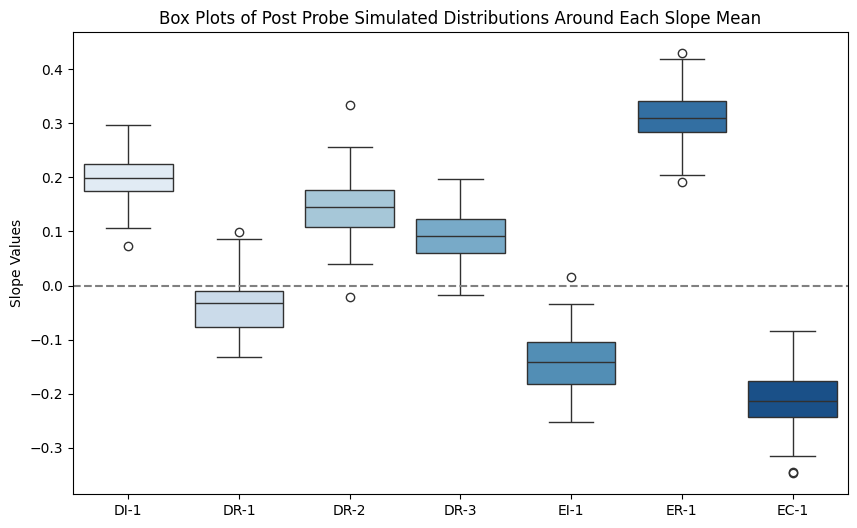

In [427]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Training data
X = regression_df[['DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1']]
y = regression_df['Response']

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your slope means
slope_means = model.coef_

np.random.seed(42)  # For reproducibility

# Simulate data: 30 samples per slope, normal distribution around each mean
# Assume some standard deviation, e.g., 0.05
simulated_data = [np.random.normal(loc=mean, scale=0.05, size=100) for mean in slope_means]

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=simulated_data,palette="Blues")

plt.xticks(ticks=range(7), labels=['DI-1','DR-1','DR-2','DR-3','EI-1','ER-1','EC-1'])
plt.ylabel('Slope Values')
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Box Plots of Post Probe Simulated Distributions Around Each Slope Mean')
plt.show()

Intercept: 0.24243852431560697
Slope: [ 0.20951743  0.01640782 -0.01824413  0.14779733 -0.06303813  0.03984581
 -0.14625882  0.30395511 -0.19212771]


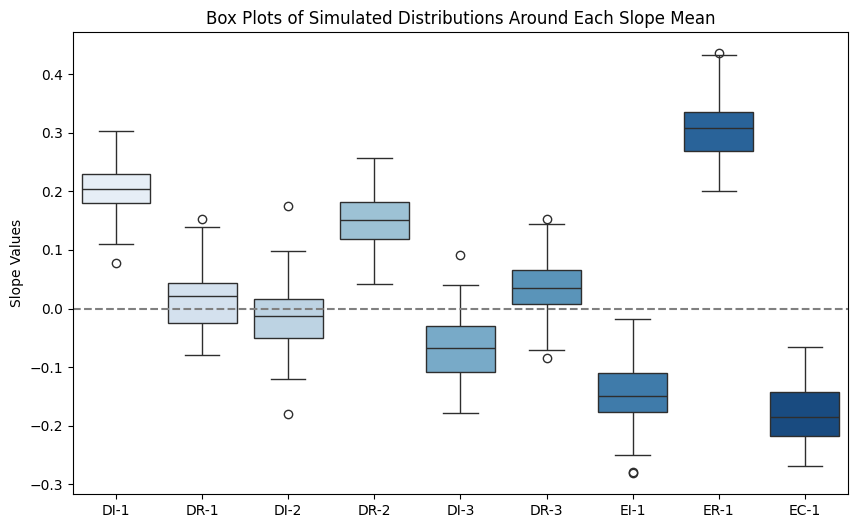

In [428]:
numlist = []
big_df = pd.DataFrame() 
for i in range(1,131):
    numlist.append(i)

colors_n = ["red", "white", "black"]

# Create combined strings
combined_new = [f"{color}, {num}" for num in numlist for color in colors_n]

big_df['Deck, Trial'] = combined_new
big_df[['color', 'number']] = big_df['Deck, Trial'].str.split(', ', expand=True)
big_df['number'] = big_df['number'].astype(int)
big_df['C'] = big_df.apply(compute_c, axis=1)
big_df['DI-1'] = big_df.apply(compute_di1, axis=1)
big_df['DR-1'] = big_df.apply(compute_dr1, axis=1)
big_df['DI-2'] = big_df.apply(compute_di2, axis=1)
big_df['DR-2'] = big_df.apply(compute_dr2, axis=1)
big_df['DI-3'] = big_df.apply(compute_di3, axis=1)
big_df['DR-3'] = big_df.apply(compute_dr3, axis=1)
big_df['EI-1'] = big_df.apply(compute_ei, axis=1)
big_df['ER-1'] = big_df.apply(compute_er, axis=1)
big_df['EC-1'] = big_df.apply(compute_ec, axis=1)
big_df['EC-1'] = big_df['EC-1'].fillna(0)
big_df.to_csv("full_regression_df.csv",index=False)



import numpy as np
from sklearn.linear_model import LinearRegression

# Training data
X = big_df[['DI-1','DR-1','DI-2','DR-2','DI-3','DR-3','EI-1','ER-1','EC-1']]
y = big_df['C']

# Create and fit model
model = LinearRegression()
model.fit(X, y)

# Coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your slope means
slope_means = model.coef_

np.random.seed(42)  # For reproducibility

# Simulate data: 30 samples per slope, normal distribution around each mean
# Assume some standard deviation, e.g., 0.05
simulated_data_full = [np.random.normal(loc=mean, scale=0.05, size=100) for mean in slope_means]

# Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=simulated_data_full,palette="Blues")

plt.xticks(ticks=range(9), labels=['DI-1','DR-1','DI-2','DR-2','DI-3','DR-3','EI-1','ER-1','EC-1'])
plt.ylabel('Slope Values')
plt.axhline(y=0,linestyle='--',color='gray')
plt.title('Box Plots of Simulated Distributions Around Each Slope Mean')
plt.show()

In [429]:
big_df

,"Deck, Trial",color,number,C,DI-1,DR-1,DI-2,DR-2,DI-3,DR-3,EI-1,ER-1,EC-1
0,"red, 1",red,1,1,0,0,0,0,0,0,0,0,0.0
1,"white, 1",white,1,0,0,0,0,0,0,0,0,0,0.0
2,"black, 1",black,1,0,0,0,0,0,0,0,0,0,0.0
3,"red, 2",red,2,1,1,1,0,0,0,0,0,0,0.0
4,"white, 2",white,2,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,"white, 129",white,129,1,1,0,0,0,1,1,0,0,0.0
386,"black, 129",black,129,0,0,0,0,0,0,0,0,0,0.0
387,"red, 130",red,130,0,0,0,0,0,1,0,0,0,0.0
388,"white, 130",white,130,0,1,1,1,0,0,0,0,0,0.0


In [430]:
import ast
import pandas as pd
best_pirate_df = df_individual[df_individual['TrialType'].str.startswith('best_pirate')].dropna(axis=1,how='all').reset_index(drop='index')
# Parse context order
chosen_pirates = best_pirate_df['choice'].dropna().values
context_order = ast.literal_eval(df_individual['contextOrder'].dropna().values[0])
unique_contexts = pd.Series(context_order).unique()

# Initialize list to store correctness
correct_flags = []
first_flags = []
for i, c in enumerate(unique_contexts):
    # Filter relevant rows
    df_context = df_individual[
        (df_individual['TrialType'].str.startswith("pirate_")) &
        (df_individual['context'] == c)
    ].dropna(axis=1, how='all')

    # Assign index column
    df_context['index'] = ['first' if j < 10 else 'main' for j in range(len(df_context))]

    # Group and compute means
    group_means = df_context.drop(columns='probe') \
        .groupby('index')[['reward_prob_red', 'reward_prob_white', 'reward_prob_black']] \
        .mean().reset_index()

    # Get max-probability color in "main" trials
    main_row = group_means[group_means['index'] == 'main'][['reward_prob_red', 'reward_prob_white', 'reward_prob_black']]
    max_col = main_row.idxmax(axis=1).values[0].replace("reward_prob_", "")

    # Get actual choice
    chose = chosen_pirates[i].replace("_pirate", "")

    # Append correctness flag
    correct_flags.append(1 if max_col == chose else 0)

    print(f"Context: {c} | Chose: {chose} | Correct: {max_col == chose} | Best Color: {max_col}")


    # Get max-probability color in "main" trials
    main_row = group_means[group_means['index'] == 'first'][['reward_prob_red', 'reward_prob_white', 'reward_prob_black']]
    next_col = main_row.idxmax(axis=1).values[0].replace("reward_prob_", "")

    # Get actual choice
    chose = chosen_pirates[i].replace("_pirate", "")

    # Append correctness flag
    first_flags.append(1 if next_col == chose else 0)

    print(f"Context: {c} | Chose: {chose} | Correct (first ten): {next_col == chose} | Best Color: {next_col}")

# Assign the full list to the DataFrame
best_pirate_df['correct'] = correct_flags
best_pirate_df['first_correct'] = first_flags

Context: driftwood_beach | Chose: red | Correct: True | Best Color: red
Context: driftwood_beach | Chose: red | Correct (first ten): False | Best Color: black
Context: sunleaf_forest | Chose: white | Correct: True | Best Color: white
Context: sunleaf_forest | Chose: white | Correct (first ten): False | Best Color: red
Context: icecap_mountain | Chose: red | Correct: False | Best Color: black
Context: icecap_mountain | Chose: red | Correct (first ten): False | Best Color: white
Context: coral_beach | Chose: white | Correct: True | Best Color: white
Context: coral_beach | Chose: white | Correct (first ten): False | Best Color: black
Context: stonepine_forest | Chose: white | Correct: False | Best Color: red
Context: stonepine_forest | Chose: white | Correct (first ten): True | Best Color: white
Context: greenrock_mountain | Chose: red | Correct: False | Best Color: black
Context: greenrock_mountain | Chose: red | Correct (first ten): True | Best Color: red


In [431]:
best_pirate_df

,ID,TrialType,PayoutDistNum,TimeElapsed,key_press,RT,context,choice,TimeInBlock,correct,first_correct
0,30240,best_pirate_1,4,2822.118402,1.0,0.834701,driftwood_beach,red_pirate,1.958871,1,0
1,30240,best_pirate_2,4,2828.116726,2.0,0.691116,sunleaf_forest,white_pirate,1.820342,1,0
2,30240,best_pirate_3,4,2835.904105,1.0,2.009782,icecap_mountain,red_pirate,3.141850,0,0
3,30240,best_pirate_4,4,2841.344062,2.0,0.105300,coral_beach,white_pirate,1.231990,1,0
4,30240,best_pirate_5,4,2848.056196,2.0,1.426943,stonepine_forest,white_pirate,2.561104,0,1
5,30240,best_pirate_6,4,2853.863599,1.0,0.441236,greenrock_mountain,red_pirate,1.567263,0,1
